
# Project : Investigate a Dataset: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
    ● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
    ● ‘Neighborhood’ indicates the location of the hospital.
    ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    ● ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
    
### Question for investigation:
    Q1: What was the overall appointment who showed and never showed up?
    Q2: How gender proportion impacting for showing /not showing up for appointment?
    Q3: How age of patient impacting for showing/not showing up appointment? More Senior or Adult?
    Q4: Does more awaiting days leading for appointment to never showed up and on which day?
    Q5: Wat was top 15 neighbourhood who showed up and never showed up?
    Q6: How does medical condition and enrolling in scholarship, and sms improved in showing up appointments?

In [1]:
# Importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### 1. General Properties

In [2]:
df=pd.read_csv("noshowappointments.csv")
print('Rows: ',df.shape[0])
print('Columns: ', df.shape[1])
df.head()

Rows:  110527
Columns:  14


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 2. Checking for null values

In [3]:
df.isnull().sum() 

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### 3. Checking for data type

In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### 4. Checking for descriptive statistics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


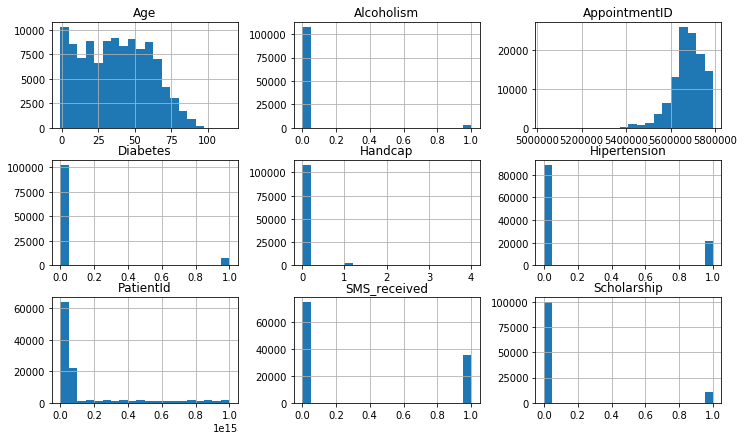

In [6]:
df.hist(figsize=(12,7),bins=20);

### 5.Checking for any duplicate

In [7]:
df.duplicated().any()

False

### 6. Checking for Unique value

In [8]:
df.AppointmentID.unique()

array([5642903, 5642503, 5642549, ..., 5630692, 5630323, 5629448],
      dtype=int64)

In [9]:
df.PatientId.nunique()

62299

In [10]:
df.PatientId.nunique()/df.PatientId.shape[0]

0.5636541297601491

In [11]:
df.PatientId.duplicated().sum()/df.PatientId.shape[0]

0.4363458702398509

In [12]:
df.ScheduledDay.nunique()

103549

In [13]:
df.AppointmentDay.nunique()

27

In [14]:
df['AppointmentDay'].head(2)

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

In [15]:
df['AppointmentDay'].tail(2)

110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, dtype: object

### 7. Observations

1.  Data set consists of 110527 values and 14 features.
2.  No missing and duplicated value for data
3.  Age ranges from -1 to 115, need to clean further.
4.  Values for "Age", "Scholarship", "Hipertension", "Diabetes", "Alcoholism","SMS_received" has values of 0 and 1.
5.  Feature "Handcap" has value from 0 to 4.
6.  "AppointmentID" holds all unique values dont hold much important feature for futher analysis and can be dropped.
7.  "Patiend ID" holds approprimately 44% of duplicated values.
8.  Values for "ScheduledDay" and "AppointmentDay" are dates with dtype as object, need to coverted into datatime.
9.  'AppointmentDay' has 27 unique values and where as ScheduledDay has 103549.
10. 'AppointmentDay' ranges from april to june for year 2016.
11.  Values for "Neighbourhood", "Gender" and "No-show" has dtype as strings
12. Many typo and spelling mistake for columns.


# Data Cleaning 

### Steps involved in data cleaning:

1. Fixing columns for typo, inconsistendcy and spelling mistakes.
2. Fixing dtype for columns scheduledday' and 'appointmentday to datetime & Creating new feature.
3. Treatment of outlier for Awaiting days.
4. Creating new feature by extraction weekday.
5. Treatment of outlier for age.
6. Dropping features which are unique and least important.

### 1. Fixing columns for typo, inconsistendcy and spelling mistakes

In [16]:
df.rename(columns={'Hipertension': 'Hypertension','Handcap': 'Handicap','No-show':'No_show'}, inplace=True)
df.columns = map(str.lower, df.columns)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

### 2. Fixing dtype for columns scheduledday' and 'appointmentday to datetime & Creating new feature 

In [17]:
sch_day = pd.to_datetime(df['scheduledday']).dt.date
app_day = pd.to_datetime(df['appointmentday']).dt.date

# Storing "waiting_days" to df as a new feature
df['awaiting_days'] = (app_day-sch_day).dt.days
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,awaiting_days
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0


### 3. Treatment of outlier for Awaiting days

In [18]:
print(sorted(df.awaiting_days.unique()))

[-6, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]


In [19]:
df.query("awaiting_days ==[-6,-1]")["awaiting_days"].value_counts()

-1    4
-6    1
Name: awaiting_days, dtype: int64

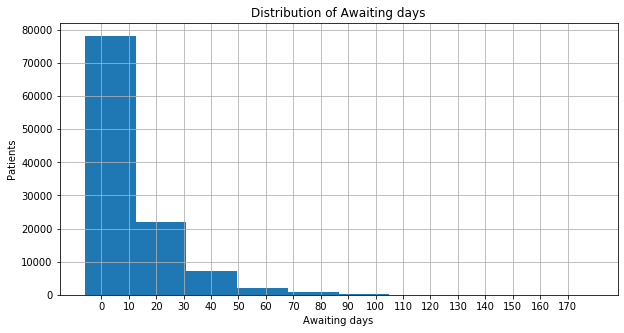

In [20]:
df.awaiting_days.hist(bins=10,figsize=(10,5))
plt.xticks(range(0, 180, 10))
plt.xlabel('Awaiting days')
plt.ylabel("Patients")
plt.title('Distribution of Awaiting days');

In [21]:
#Only keep records of patients where they are between 0-70 in number of waiting days to remove outliers
df = df[(df.awaiting_days >= 0) & (df.awaiting_days <= 70)]
print ("Waiting_days: ", sorted(df.awaiting_days.unique()))

Waiting_days:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]


### 4. Creating new feature by extraction weekday

In [22]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['day_of_week'] = df['appointmentday'].dt.weekday_name
df.tail(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,awaiting_days,day_of_week
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,41,Tuesday
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No,41,Tuesday


### 5. Treatment of outlier for age

In [23]:
print(sorted(df['age'].unique()))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


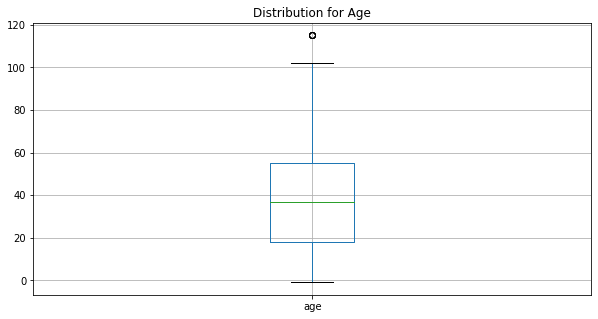

In [24]:
df['age'].plot(kind='box',figsize=(10,5), grid=True)
plt.title('Distribution for Age');

In [25]:
# Only keep records of patients where they are between 0-100 in age to remove outliers.
df = df[(df.age >= 0) & (df.age <= 100)]

min_age = df['age'].min()
max_age = df['age'].max()
print ("age range from : {} to {}.".format(min_age, max_age))

age range from : 0 to 100.


### 6. Dropping features which are unique and least important.

In [26]:
print ("PatientIds: ", len(df.patientid.unique()))
print ("\nAppointmentIds: ", len(df.appointmentid.unique()))
print ("\nNo. of appointment days: ", len(df.appointmentday.unique()))
print ("\nGender: ", df.gender.unique())
print ("\nAge: ", sorted(df.age.unique()), "\n Unique values: ", len(df.age.unique()))
print ("\nSMS_received: ", df.sms_received.unique())
print ("\nScholarship: ", df.scholarship.unique())
print ("\nHypertension: ", df.hypertension.unique())
print ("\nDiabetes: ", df.diabetes.unique())
print ("\nAlcoholism: ", df.alcoholism.unique())
print ("\nHandicap: ", df.handicap.unique())
print ("\nNo_show: ", df.no_show.unique())
print ("\nWaiting days: ", sorted(df.awaiting_days.unique()))
print ("\nday_of_week: ", sorted(df.day_of_week.unique()))
print ("\nBrazilian neighbourhoods: ", len(df.neighbourhood.unique()))

PatientIds:  61865

AppointmentIds:  109631

No. of appointment days:  27

Gender:  ['F' 'M']

Age:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100] 
 Unique values:  101

SMS_received:  [0 1]

Scholarship:  [0 1]

Hypertension:  [1 0]

Diabetes:  [0 1]

Alcoholism:  [0 1]

Handicap:  [0 1 2 3 4]

No_show:  ['No' 'Yes']

Waiting days:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]

day_of_week:  ['Friday', 'Monday', 'Sa

In [27]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show',
       'awaiting_days', 'day_of_week'],
      dtype='object')

In [28]:
df.drop(columns=['appointmentid',"scheduledday","appointmentday"],axis=1,inplace=True)

In [29]:
df.head(2)

,patientid,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,awaiting_days,day_of_week
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday


In [30]:
df.shape

(109631, 13)

<a id='eda'></a>
# Exploratory Data Analysis


## Research Question 1 : What is the overall appointment who showed and never showed up?

No     87576
Yes    22055
Name: no_show, dtype: int64
Percent who show up to their appointment: 79.88
Percent who didn't show up to their appointment: 20.12


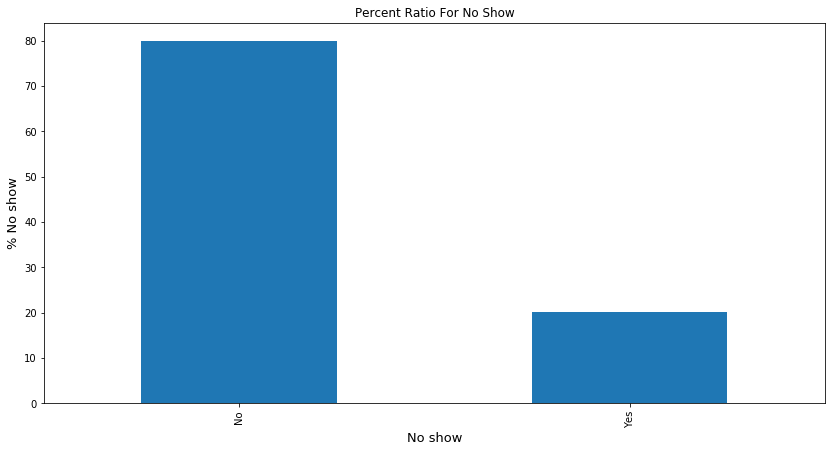

In [31]:
no_show = df["no_show"].value_counts()
print(no_show)


percent_showed = no_show["No"]/ no_show.sum() * 100
percent_never_showed = no_show["Yes"]/ no_show.sum() * 100
print("Percent who show up to their appointment:",np.round(percent_showed,2))
print("Percent who didn't show up to their appointment:",np.round(percent_never_showed,2))

(no_show/no_show.sum()*100).plot('bar',title="Percent Ratio For No Show",figsize=(14,7))
plt.xlabel('No show',fontsize=13)
plt.ylabel('% No show', fontsize=13);

1. Majority of appointment are showed up by 80% when compared to are never showed up by 20%, 
2. If it would be for machine learning, then this target variable can create imbalance problem.

## Research Question 2 : How gender proportion impacting for showing /not showing up for appointment?

### 2.1. Checking for appointments who showed up by gender

In [32]:
no_noshow_gender=df.query('no_show=="No"')['gender'].value_counts()
print(no_noshow_gender)

# Percent for female who showed up
percent_no_show_female = no_noshow_gender["F"]/ no_noshow_gender.sum() * 100
print("Percent for Female who show up to their appointment:",np.round(percent_no_show_female,2))

#Percent for male who showed up
percent_no_show_male = no_noshow_gender["M"]/ no_noshow_gender.sum() * 100
print("Percent for male who show up to their appointment:",np.round(percent_no_show_male,2))

F    56806
M    30770
Name: gender, dtype: int64
Percent for Female who show up to their appointment: 64.86
Percent for male who show up to their appointment: 35.14


### 2.2. Checking for appointments who never showed up by gender

In [33]:
yes_noshow_gender=df.query('no_show=="Yes"')['gender'].value_counts()
print(yes_noshow_gender)

# Percent for female who never showed up
percent_no_show_female_never= yes_noshow_gender["F"]/yes_noshow_gender.sum() * 100
print("Percent for female who never show up to their appointment:",np.round(percent_no_show_female_never,2))

#Percent for male who never showed up
percent_no_show_male_never = yes_noshow_gender["M"]/yes_noshow_gender.sum() * 100
print("Percent for male who never show up to their appointment:",np.round(percent_no_show_male_never,2))

F    14403
M     7652
Name: gender, dtype: int64
Percent for female who never show up to their appointment: 65.3
Percent for male who never show up to their appointment: 34.7


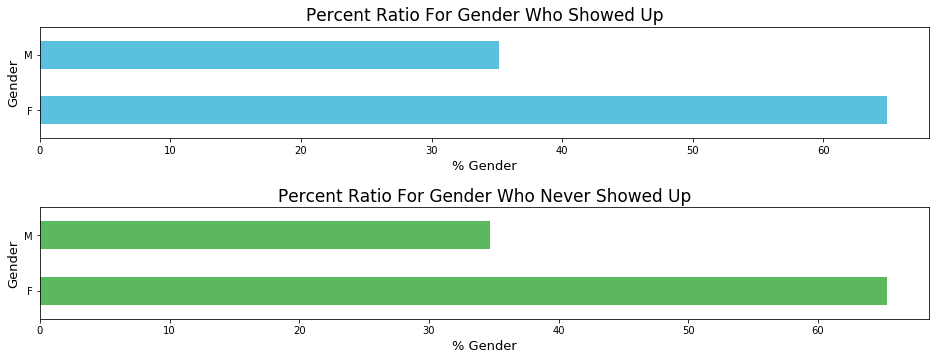

In [34]:
fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
(no_noshow_gender/no_noshow_gender.sum()*100).plot(kind='barh',figsize=(13,5), color='#5bc0de')
plt.title('Percent Ratio For Gender Who Showed Up', fontsize=17)
plt.xlabel('% Gender',fontsize=13)
plt.ylabel('Gender', fontsize=13);

plt.subplot(2,1,2)
(yes_noshow_gender/yes_noshow_gender.sum()*100).plot(kind='barh',figsize=(13,5), color='#5cb85c')
plt.title('Percent Ratio For Gender Who Never Showed Up', fontsize=17)
plt.xlabel('% Gender',fontsize=13)
plt.ylabel('Gender', fontsize=13)
plt.tight_layout(pad=0.7, w_pad=0.6, h_pad=1.5);

1. Not much difference can be seen between gender who showed up or never showed.
2. Female proportion almost same for appointment showed up i.e 64.86 and never showed i.e 65.3.
3. Male proportion are also almost same for appointment showed up i.e 35.14 and never showed i.e 34.7.
4. In context of proportion for gender, Female are majorly higher than man for showing up and never showing up as well.

### Research Question 3 : How age of patient impacting for showing/not showing up appointment? More Senior  or Adult?

In [35]:
gender_show=df.groupby('no_show')['age'].mean()
print(gender_show)

no_show
No     37.659222
Yes    34.150034
Name: age, dtype: float64


In [36]:
df.groupby(['no_show','gender'])['age'].mean()

no_show  gender
No       F         39.454389
         M         34.345076
Yes      F         35.999375
         M         30.669106
Name: age, dtype: float64

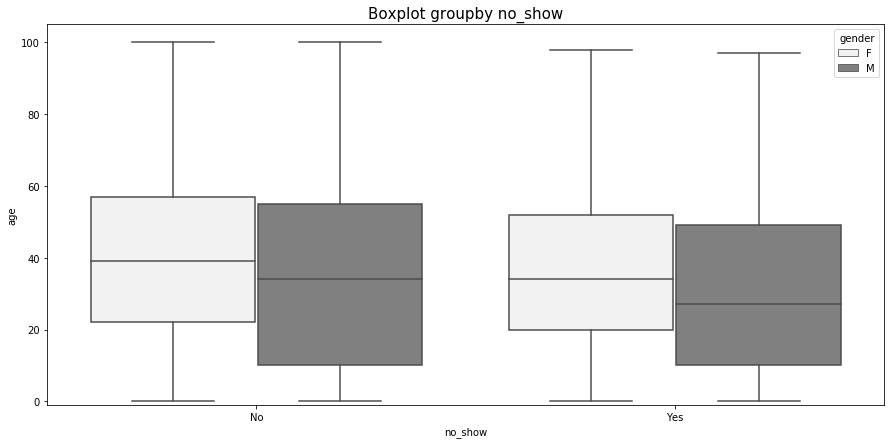

In [37]:
plt.figure(figsize=(15,7))
sns.boxplot(x='no_show',y='age',hue='gender', data=df, color=".50")
plt.ylim(-1,105,5)
plt.title('Boxplot groupby no_show',fontsize=15);

1. Patient with more age is most likely to show up appointment.
2. Mean age for female is greater than Male age in both showed up and never showed up. 
3. Female with more age are most likely to show up appointment when compared with whom never showed up. 
4. Male with less age are most likely to never show up appointment when compared with whom showed up appointment. 
5. Age can be important feature in predicting for appointment showing up and not showing due to patient with more age        are most likely to be showing up appointment.

### Research Question 4 :Does more awaiting days leading for appointment to never showed up and on which day?

Average Awaiting days :
 no_show
No      8.178120
Yes    14.984312
Name: awaiting_days, dtype: float64
no_show  day_of_week
No       Friday          8.246107
         Monday          8.476699
         Saturday        3.966667
         Thursday        7.674390
         Tuesday         8.237130
         Wednesday       8.155608
Yes      Friday         14.577475
         Monday         16.764009
         Saturday        5.111111
         Thursday       14.479903
         Tuesday        15.082259
         Wednesday      13.912016
Name: awaiting_days, dtype: float64


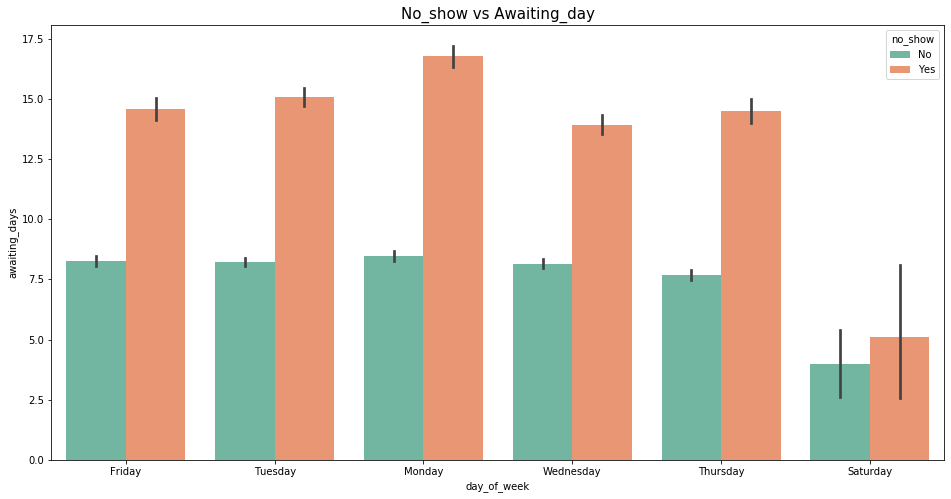

In [38]:
waiting_noshow=df.groupby('no_show')['awaiting_days'].mean()
print('Average Awaiting days :\n',waiting_noshow)

waiting_noshow_day=df.groupby(['no_show','day_of_week'])['awaiting_days'].mean()
print(waiting_noshow_day)

plt.figure(figsize=(16,8))
sns.barplot(x="day_of_week", y="awaiting_days",hue='no_show', data=df,palette='Set2')
plt.title('No_show vs Awaiting_day',fontsize=15);

1. As expected as number of awaiting days increase there are more cases are of not showing up appointment.
2. Monday has majority of appointment which never showed up and least on saturday and visa vera.
3. Average awaiting days for not showing up was almost twice the average awaiting days for showing up.
4. Awaiting days turn out to be important feature in predicting for appointment in showing up and for not showing up.

### Research Question 5: Wat are top 15 neighbourhood who showed up and never showed up?

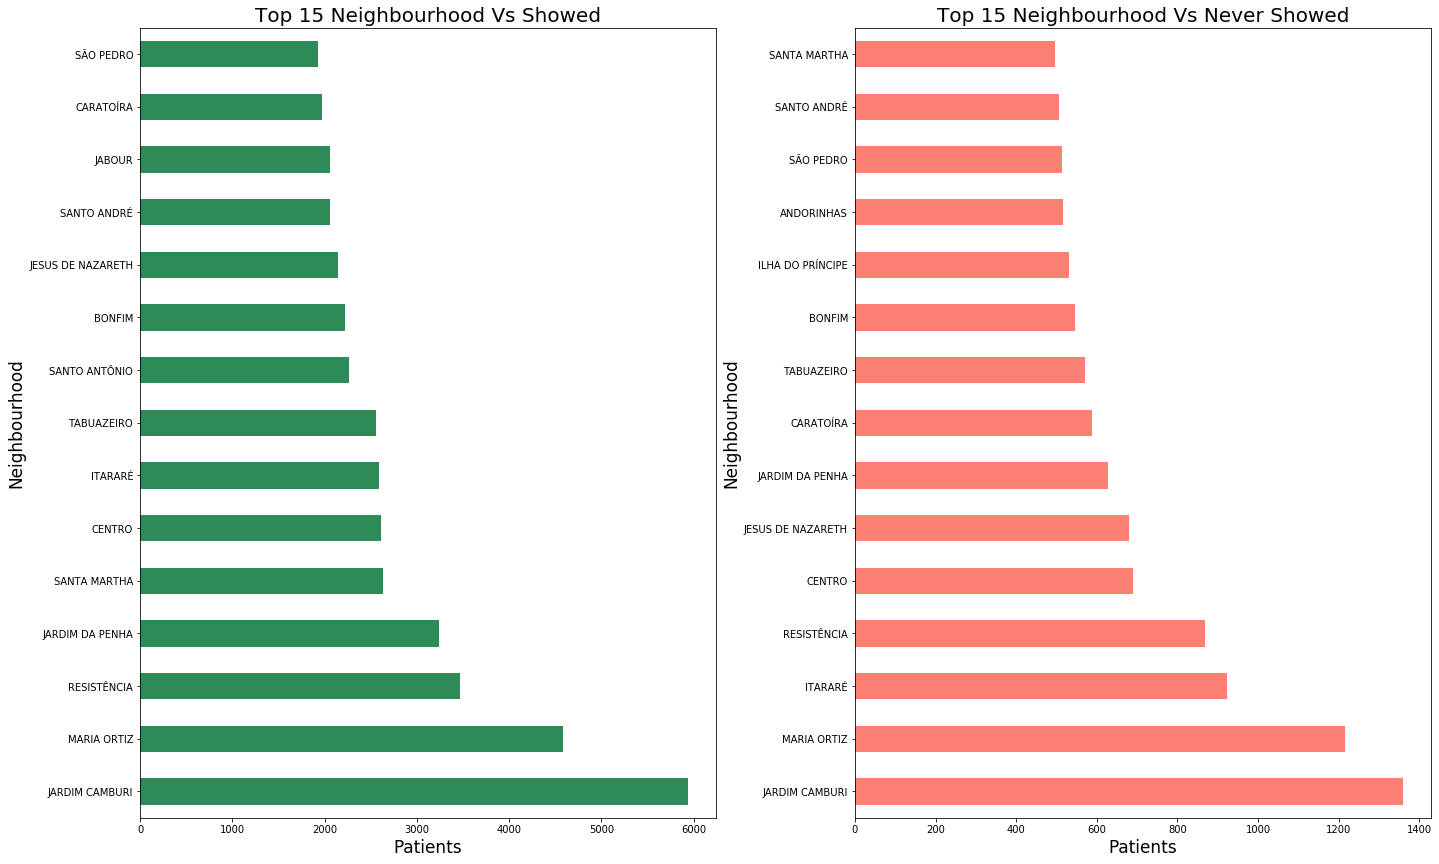

In [39]:
fig = plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
neigh_showed=df.query('no_show=="No"')['neighbourhood'].value_counts().head(15)
neigh_showed.sort_values(ascending=False)
neigh_showed.plot(kind='barh',color='seagreen')
plt.title('Top 15 Neighbourhood Vs Showed', fontsize=20)
plt.xlabel('Patients',fontsize=17)
plt.ylabel('Neighbourhood', fontsize=17)

plt.subplot(1,2,2)
neigh_nevershowed=df.query('no_show=="Yes"')['neighbourhood'].value_counts().head(15)
neigh_nevershowed.sort_values(ascending=False)
neigh_nevershowed.plot(kind='barh',color='salmon')
plt.title('Top 15 Neighbourhood Vs Never Showed', fontsize=20)
plt.xlabel('Patients',fontsize=17)
plt.ylabel('Neighbourhood', fontsize=17)


plt.tight_layout(pad=0.7, w_pad=0.6, h_pad=1.5)

1. Not much difference between showed and not showed cases between neighbourhood. 

### Research Question 6: How does medical condition, enrolling in scholarship, and sms improved in showing up appointments?

scholarship          0         1
no_show                         
No           72.343589  7.538926
Yes          17.781467  2.336018
sms_received          0          1
no_show                           
No            56.749460  23.133055
Yes           11.307021   8.810464
hypertension          0          1
no_show                           
No            63.594239  16.288276
Yes           16.745264   3.372221
diabetes          0         1
no_show                      
No        73.991845  5.890670
Yes       18.834089  1.283396
alcoholism          0         1
no_show                        
No          77.439775  2.442740
Yes         19.503608  0.613877
handicap          0         1         2         3         4
no_show                                                    
No        78.224225  1.514170  0.133174  0.009122  0.001824
Yes       19.759922  0.321077  0.032837  0.002736  0.000912


<Figure size 432x288 with 0 Axes>

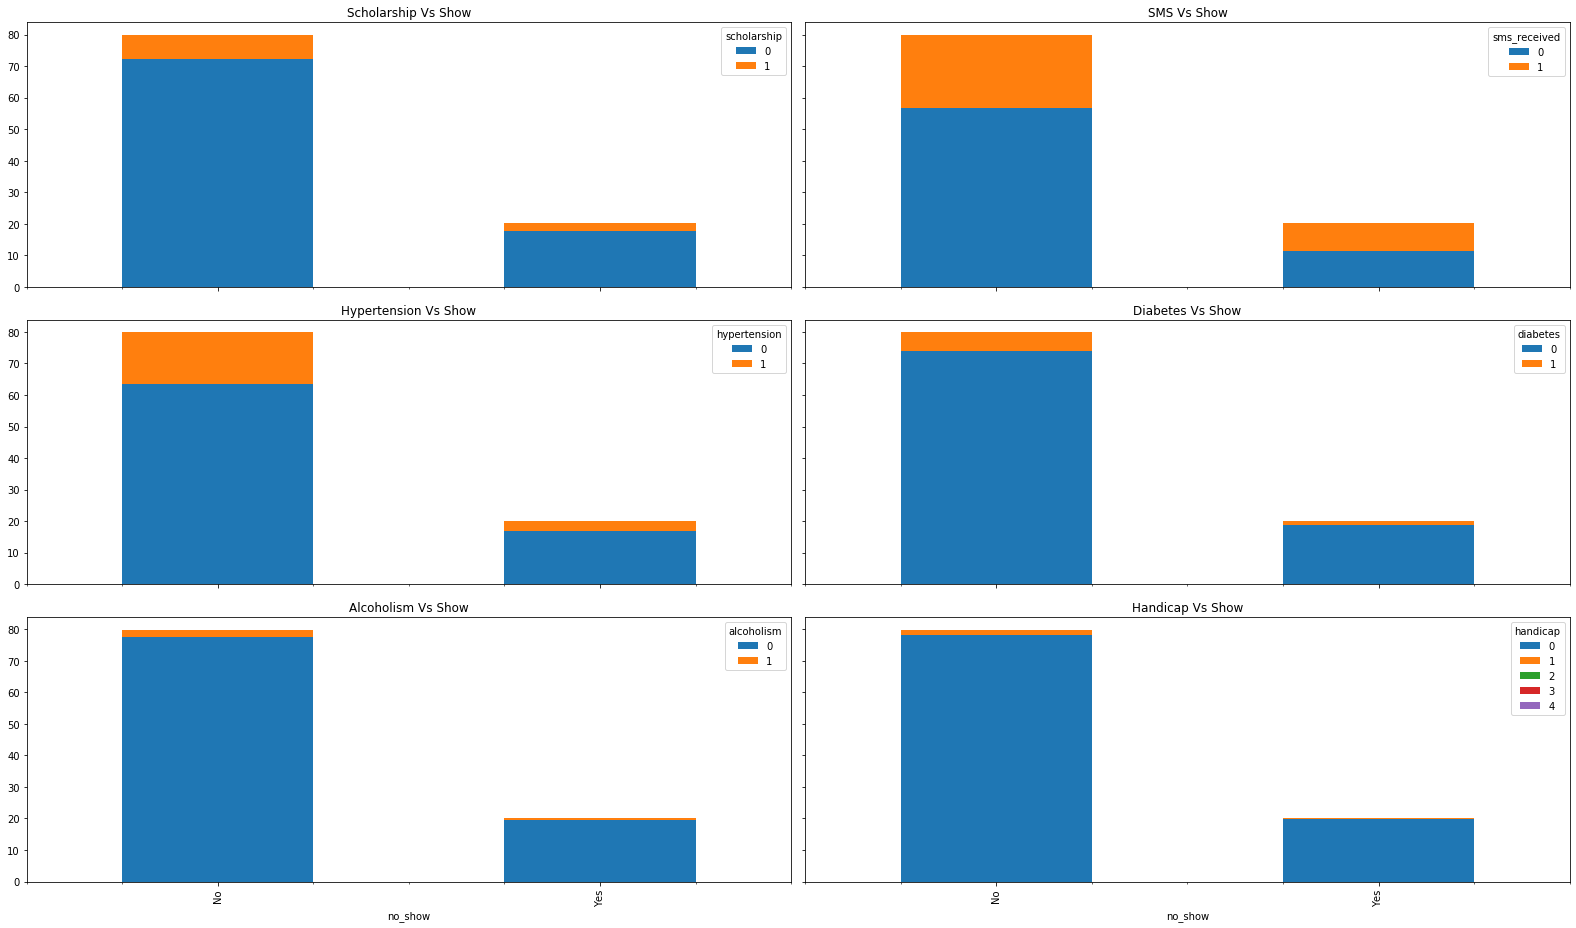

In [40]:
schol_show=pd.crosstab(df['no_show'],df['scholarship'])/df['no_show'].shape[0]*100
hyp_show=pd.crosstab(df['no_show'],df['hypertension'])/df['no_show'].shape[0]*100
diab_show=pd.crosstab(df['no_show'],df['diabetes'])/df['no_show'].shape[0]*100
alco_show=pd.crosstab(df['no_show'],df['alcoholism'])/df['no_show'].shape[0]*100
sms_show=pd.crosstab(df['no_show'],df['sms_received'])/df['no_show'].shape[0]*100
handi_show=pd.crosstab(df['no_show'],df['handicap'])/df['no_show'].shape[0]*100

print(schol_show)
print(sms_show)
print(hyp_show)
print(diab_show)
print(alco_show)
print(handi_show)

fig = plt.figure()
fig, ax = plt.subplots(3, 2, sharex='all',sharey='all')


schol_show.plot(kind='bar',ax=ax[0,0],figsize=(22,13),title='Scholarship Vs Show',stacked=True)

sms_show.plot(kind='bar',ax=ax[0,1],figsize=(22,13),title='SMS Vs Show',stacked=True)

hyp_show.plot(kind='bar',ax=ax[1,0],figsize=(22,13),title='Hypertension Vs Show',stacked=True)

diab_show.plot(kind='bar',ax=ax[1,1],figsize=(22,13), title='Diabetes Vs Show',stacked=True)

alco_show.plot(kind='bar',ax=ax[2,0],figsize=(22,13),title='Alcoholism Vs Show',stacked=True)

handi_show.plot(kind='bar',ax=ax[2,1],figsize=(22,13),title='Handicap Vs Show',stacked=True)

plt.tight_layout();

1. Patients who didn't enrolled in scholorship has more show case i.e 72% when compared to those who are enrolled 7.5%.
2. Ratio for showed up to no showed scholorship is approximately 80%
3. The group who received a SMS reminder did not show up more often compared to those who did not receive a reminder. 
4. The group not having received a reminder has a much smaller proportion of no shows.
5. Patient with medical condition like hypertension, diabetes and alcholism has showed up for appointment in less as 
compared with patient without any medical condion.
6. Proportion of never showed for all medical condition are approximately smilar for all with showed up case.
7. Handicap of value '0' have more showed up when compared to those no showed up and for other values.

<a id='conclusions'></a>
## Conclusions

1. My analysis revealed that patients age and number of awaiting days for appointment could be an important feature in determining if patient is going to show up for appointment or not.

2. Futhere patient without any of the in the dataset stated diseases have higher no-show rates compared to those having a disease. Thereby it does not make much of a difference, which disease (hypertension, diabetes, alcoholism or handicap) the patient suffers.

3. Enrolling in scholorship has not much impact on predicting for possiblity if patient in going to turn up for show or not.

4. Lastly, and most surprisingly is the fact that for the appointments within this dataset a SMS-reminding the patients of their upcoming appointment made things worse.

## Limitations

1. It appears that the dataset is only based on 27 unique dates worth of data spread over April, May and June (27 unique dates in AppointmentDay) and therefore it doesn't provide a representative sample for predicting whether a patient is likely to not show up on a date outside of those 27 days. If the data was based on longer date range, then the conclusions drawn might have been different and the features in feature selection may also have been completely different.

2. Missing features which may have been useful to this analysis could be whether a patient in the past has been a no-show, or a patient's post-code, clinic distance from neighbourhood, or whether the patient is employed or unemployed or even the reason they scheduled an appointment.